# Appendix

In [1]:
with open('common.py') as fin:
    exec(fin.read())

In [2]:
with open('matplotlibconf.py') as fin:
    exec(fin.read())

Throughout the labs we use several mathematical concepts drawn from [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra) and [calculus](https://en.wikipedia.org/wiki/Calculus). In this appendix we review them in little more detail. This is meant to be for the curious reader and it's not necessary in order to complete the labs.

## Matrix multiplication

We have introduced matrix in lab 1. As you know an $N\times M$ matrix is an array of numbers organized in $N$ rows and $M$ columns.

Matrices are multiplied with the same rule of the dot product. Two matrices $A$ and $B$ can be multiplied if the number of columns of the first is equal to the number of rows of the second. If $A$ is 2x3 and $B$ is 3x2, they can be multiplied and the resulting matrix will have shape 2x2 if we do A.B and 3x3 if we do B.A.

However, if $A$ is 2x4 and $B$ is 3x5, we **cannot** multiply the two matrices. 

The figure below shows how the elements of this matrix are calculated:

![](assets/matrices.png)

Let's create 2 matrices in numpy using 2D-array method and check this formula:

In [3]:
A = np.array([[0, 1, 2],
              [2, 3, 0]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


The matrix product in Numpy is a function called `dot`. We can access it as a method of an array:

In [4]:
A.dot(B)

array([[10, 13],
       [ 6, 11]])

or as a function in Numpy:

In [5]:
np.dot(A, B)

array([[10, 13],
       [ 6, 11]])

Notice that if we invert the order we do get a 3x3 matrix instead:

In [6]:
B.dot(A)

array([[ 2,  3,  0],
       [ 6, 11,  4],
       [10, 19,  8]])

Or, using the `np.dot()` version, we get the same as these two methods are functionally equivalent:

In [7]:
np.dot(B, A)

array([[ 2,  3,  0],
       [ 6, 11,  4],
       [10, 19,  8]])

We can also perform the matrix multiplication `C.dot(A)`, however, matrix multiplications are only possible along axes with the same length. So, for example, we cannot perform the multiplication `A.dot(C)`.

In [8]:
C.dot(A)

array([[ 2,  3,  0],
       [ 6, 11,  4],
       [10, 19,  8],
       [ 2,  3,  0],
       [ 6, 11,  4],
       [10, 19,  8]])

For example, uncomment the next line to get the following error:

```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-11-9c5b5a616184> in <module>()
      1 # uncomment the next line to get an error
----> 2 A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)
```

In [9]:
# A.dot(C)

> TIP: remember this `ValueError` for mismatching shapes. It's very common when building Neural Networks.

## Chain rule

### Univariate functions

The [chain rule](https://en.wikipedia.org/wiki/Chain_rule) is a rule to calculate the derivative of nested functions.

For example, let’s say we have a function:

\begin{equation}
h(x) = \log(2 + \cos(x))
\end{equation}

How do we calculate the derivative of this function with respect to $x$? This function is a composition of the two functions

\begin{equation}
f(y) = \log(y)\quad \quad g(x) = 2 + cos(x)
\end{equation}

so we can write $h$ as a nested function:

\begin{equation}
h(x) = f(g(x))
\end{equation}

We can calculate the derivative of $h$ with respect to $x$ by applying the *chain rule*:

- first we calculate the derivative of $g$ with respect to $x$
- then we calculate the derivative of $f$ with respect to $g$
- finally we multiply the two

\begin{equation}
\frac{dh(x)}{dx} = \frac{d}{dx} f(g(x)) = \frac{df}{dg}\cdot\frac{dg}{dx}
\end{equation}


Using the table above we find:

\begin{equation}
\frac{d}{dx} (2 + \cos(x)) = -\sin(x) \quad
\frac{d}{dg} \log(g) = \frac{1}{g}
\end{equation}

So finally, the derivative of our nested function $h$ of $x$ is the product of the two derivatives:


\begin{equation}
\frac{d}{dx} \log(2 + \cos(x)) = \frac{-\sin(x)}{2 + \cos(x)}
\end{equation}

Notice that we substituted $g$ with $2 + \cos(x)$ in the denominator.

#### Code example

Let's define all the above functions and verify that the derivative of $h$ calculated with the chain rule is equivalent to the derivative calculated with the `np.diff` function.

In [10]:
def f(x):
    return np.log(x)

def g(x):
    return 2 + np.cos(x)

def h(x):
    return f(g(x))

def df(x):
    return 1/x

def dg(x):
    return -np.sin(x)

def dh(x):
    return df(g(x)) * dg(x)

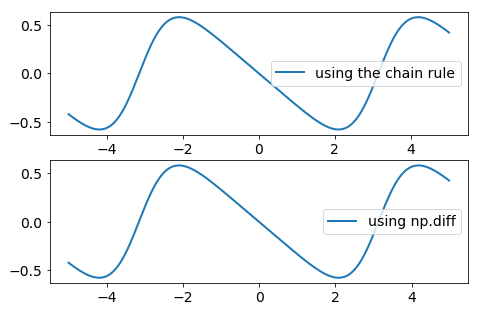

In [11]:
x = np.linspace(-5, 5, 500)

plt.subplot(211)
plt.plot(x, dh(x))
plt.legend(['using the chain rule'])

plt.subplot(212)
plt.plot(x[:-1], np.diff(h(x))/np.diff(x))
plt.legend(['using np.diff'])

The two are results are the same (minus numerical errors), as expected!

### Multivariate functions

The chain rule can be easily extended to the case where $f$ has multiple functions as arguments:

\begin{equation}
h(x) = f(g(x), k(x))
\end{equation}

We simply distribute the chain rule to all the arguments that depend on $x$:

\begin{equation}
\frac{dh(x)}{dx} = \frac{\partial f}{\partial g}\cdot\frac{dg}{dx} + \frac{\partial f}{\partial k}\cdot\frac{dk}{dx}
\end{equation}

Notice that here we are using the [partial derivative](https://en.wikipedia.org/wiki/Partial_derivative) symbol $\partial$ which simply means we are taking the derivative with respect to one of the variables while keeping all the others fixed.

### Exponentially Weighted Moving Average (EWMA)

The **[EWMA](https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average) is the most important algorithm of your life**. We often use this joke in classes to get the attention of our students. Although this may or may not true in your particular case, it is true that this algorithm crops up everywhere, from financial time series to signal processing to Neural Networks.

Different domains name it in different ways but it's actually always the same thing and it's worth knowing how it works in detail.

Let us have a look at how it works. Let's say we have a sequence of ordered datapoints. These could be the values of a stock, temperature measurements, anything that is measured in a sequence.

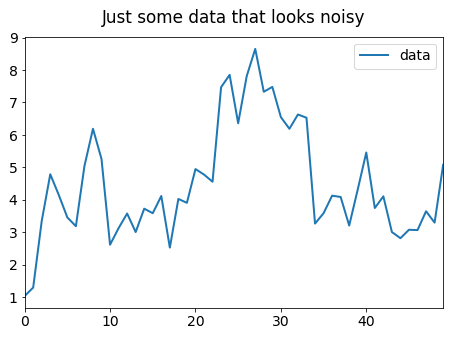

In [12]:
points = pd.DataFrame([1.04, 1.30, 3.35, 4.79, 4.15,
                       3.46, 3.19, 5.04, 6.19, 5.26,
                       2.62, 3.13, 3.58, 3.01, 3.73,
                       3.59, 4.12, 2.53, 4.03, 3.91,
                       4.95, 4.78, 4.56, 7.47, 7.85,
                       6.36, 7.81, 8.65, 7.33, 7.48,
                       6.55, 6.19, 6.63, 6.53, 3.27, 
                       3.59, 4.13, 4.09, 3.21, 4.32,
                       5.46, 3.75, 4.11, 3.01, 2.82, 
                       3.08, 3.07, 3.65, 3.30, 5.08],
                      columns=['data'])
points.plot(title='Just some data that looks noisy')
plt.show()

If this data is noisy, we may want to reduce the noise in order to obtain a more accurate estimation of the underlying actual values. One easy way to remove noise from a time series is to perform a **rolling average** or **moving average**: you wait to accumulate a certain number of observations and and use their average as the estimation of the current value.
This method works, but it requires to hold the past values in a memory buffer and constantly update such buffer when a new data point of the sequence arrives. So if we want to average over a long window, we have to keep the whole window in memory, and also we cannot calculate the first average until we have observed at least as many points as the window contains (unless we pad with zeros).

Rolling averages are available in `Pandas` through the `.rolling()` method. Let's plot a few examples:

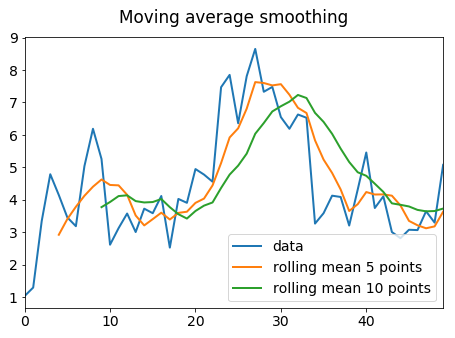

In [13]:
points['rolling mean 5 points'] = \
    points['data'].rolling(5).mean()
points['rolling mean 10 points'] = \
    points['data'].rolling(10).mean()
points.plot(title='Moving average smoothing')
plt.show()

**EWMA** differs from the moving average because it only requires knowledge of the previous value of the data and of the current value of the EWMA itself.

Let's indicate the values of our sequence as $x_0$, $x_1$, $x_2$, ..., $x_n$. We can calculate the value of the corresponding EWMA recursively as:

\begin{align}
y_0 & = x_0 \\
y_n & = (1 - \alpha) \; y_{n-1} + \alpha \; x_n
\end{align}

The two extreme cases of this formula are $\alpha=0$, in which case the value of $y_n$ will remain fixed to $x_0$ forever and $\alpha=1$, in which case $y_n$ will be exactly tracking the value of $x_n$.

If $\alpha$ is between 0 and 1, the EWMA will smooth the signal reducing its fluctuations. Let's walk through an example with $\alpha=0.9$ to clarify how it works.

When the first point $x_0$ comes in, the EWMA is set to be equal to the raw data, so $y_0 = x_0$. 

Then, the second raw value $x_1$ comes in, we take 90% of it and add it to 10% of the previous value of the moving average $y_0$:

\begin{equation}
y_1 = 0.1\, y_0 + 0.9\, x_1
\end{equation}

Since, $y_0 = x_0$, the previous formula is equivalent to:


\begin{equation}
y_1 = 0.1\, x_0 + 0.9\, x_1
\end{equation}

So, the value of the EWMA will be almost equal to the initial value, with 90% contribution from the new value $x_1$.

Then, the third point $x_2$ comes in. Again, we take 90% of its value and add it to 10% of the current EWMA value $y_1$.

\begin{align}
y_2 & = 0.1 \, y_1 + 0.9\, x_2 \\
    & = 0.1 \, (0.1\, x_0 + 0.9\, x_1) + 0.9\, x_2 \\
    & = 0.01\, x_0 + 0.09\, x_1 + 0.9\, x_2 \\
\end{align}

This third point will still be mostly influenced by the initial point, but it will also contain contributions from the most recent two points.

Let's look at a couple more steps. Here's $y_3$:

\begin{align}
y_3 & = 0.1 \, y_2 + 0.9\, x_3 \\
    & = 0.1 \, (0.01\, x_0 + 0.09\, x_1 + 0.9\, x_2) + 0.9\, x_3 \\
    & = 0.001\, x_0 + 0.009\, x_1 + 0.09\, x_2  + 0.9\, x_3 \\
\end{align}

and here's $y_4$:

\begin{align}
y_4 & = 0.1 \, y_3 + 0.9\, x_4 \\
    & = 0.1 \, (0.001\, x_0 + 0.009\, x_1 + 0.09\, x_2  + 0.9\, x_3) + 0.9\, x_4 \\
    & = 0.0001\, x_0 + 0.0009\, x_1 + 0.009\, x_2 + 0.09\, x_3  + 0.9\, x_4
\end{align}

As you can see the value of $y_4$ is influenced by all the previous values of $x$ in an exponentially decreasing fashion.

We can continue playing this game at each new point, and all we need to keep in memory is the previous value of the EWMA $y_{n-1}$ until we have mixed it with the current raw value of the signal $x_n$.

This formula is great for two reasons:

1. We only keep the last values of the EWMA in memory, no need for a buffer.
1. We can calculate it from the beginning of the sequence instead of waiting to accumulate some values.

This formula is very popular and goes under different names in different domains. Statisticians would call it an [**autoregressive integrated moving average**](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) model with no constant term or `(ARIMA) (0,1,1)`. Signal processing people would call it a first order [**Infinite Impulse Response**](https://en.wikipedia.org/wiki/Infinite_impulse_response) (IIR) filter, but it's the same thing.

The idea is simple. Each new value of the smoothed sequence is the sum of two terms: its own previous value and the current new value of the sequence. The ratio of the mixing is controlled by the parameter $\alpha$: very large values will skew the mix towards the raw data, with very little smoothing, very small $\alpha$ (pronounced _alpha_) will skew the mix towards the previous smoothed value, therefore with very strong smoothing.

EWMAs are also available in `pandas`, let's plot a few:

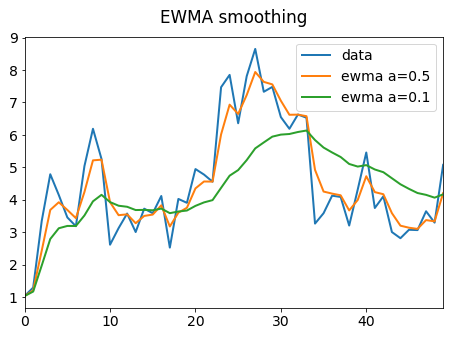

In [14]:
points['ewma a=0.5'] = points['data'].ewm(alpha=0.5).mean()
points['ewma a=0.1'] = points['data'].ewm(alpha=0.1).mean()

cols_ = ['data', 'ewma a=0.5', 'ewma a=0.1']
points[cols_].plot(title='EWMA smoothing')
plt.show()

You can notice a couple of things when comparing this plot with the previous one:

1. the smoothed curves start immediately, we don't have to wait in order to calculate the EWMA
- a smaller value for alpha gives a stronger smoothing

This algorithm is simple and beautiful, and you will encounter it in many places, beyond optimizers for neural nets.

## Tensors

Let's create a couple of test tensors. We will create a tensor `A` of order 4 and a tensor `B` of order 2:

In [15]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [16]:
A

array([[[[1, 2, 6, 5, 1],
         [2, 1, 2, 5, 5],
         [4, 3, 3, 7, 3],
         [3, 3, 9, 0, 7]],

        [[4, 6, 1, 4, 8],
         [1, 8, 7, 5, 9],
         [2, 1, 1, 3, 2],
         [9, 7, 8, 1, 8]],

        [[6, 6, 6, 9, 2],
         [4, 9, 0, 4, 2],
         [6, 0, 9, 3, 0],
         [2, 1, 1, 8, 7]]],


       [[[1, 9, 0, 1, 6],
         [6, 0, 1, 6, 7],
         [7, 1, 1, 4, 5],
         [0, 9, 3, 0, 1]],

        [[7, 7, 5, 1, 6],
         [2, 9, 0, 1, 8],
         [0, 2, 2, 9, 4],
         [7, 4, 4, 4, 0]],

        [[2, 4, 6, 1, 1],
         [0, 1, 0, 5, 1],
         [7, 4, 9, 9, 9],
         [0, 1, 6, 8, 7]]]])

In [17]:
B

array([[3, 7, 2],
       [8, 4, 4]])

A single number in `A` is located by four coordinates, so for example:

In [18]:
A[0, 1, 0, 3]

4

Tensors can be multiplied by a scalar, and their shape remains the same:

In [19]:
A2 = 2 * A
A2

array([[[[ 2,  4, 12, 10,  2],
         [ 4,  2,  4, 10, 10],
         [ 8,  6,  6, 14,  6],
         [ 6,  6, 18,  0, 14]],

        [[ 8, 12,  2,  8, 16],
         [ 2, 16, 14, 10, 18],
         [ 4,  2,  2,  6,  4],
         [18, 14, 16,  2, 16]],

        [[12, 12, 12, 18,  4],
         [ 8, 18,  0,  8,  4],
         [12,  0, 18,  6,  0],
         [ 4,  2,  2, 16, 14]]],


       [[[ 2, 18,  0,  2, 12],
         [12,  0,  2, 12, 14],
         [14,  2,  2,  8, 10],
         [ 0, 18,  6,  0,  2]],

        [[14, 14, 10,  2, 12],
         [ 4, 18,  0,  2, 16],
         [ 0,  4,  4, 18,  8],
         [14,  8,  8,  8,  0]],

        [[ 4,  8, 12,  2,  2],
         [ 0,  2,  0, 10,  2],
         [14,  8, 18, 18, 18],
         [ 0,  2, 12, 16, 14]]]])

In [20]:
A.shape == A2.shape

True

We can also add tensors of the same shape element by element to obtain a third tensor with the same shape:

In [21]:
A + A2

array([[[[ 3,  6, 18, 15,  3],
         [ 6,  3,  6, 15, 15],
         [12,  9,  9, 21,  9],
         [ 9,  9, 27,  0, 21]],

        [[12, 18,  3, 12, 24],
         [ 3, 24, 21, 15, 27],
         [ 6,  3,  3,  9,  6],
         [27, 21, 24,  3, 24]],

        [[18, 18, 18, 27,  6],
         [12, 27,  0, 12,  6],
         [18,  0, 27,  9,  0],
         [ 6,  3,  3, 24, 21]]],


       [[[ 3, 27,  0,  3, 18],
         [18,  0,  3, 18, 21],
         [21,  3,  3, 12, 15],
         [ 0, 27,  9,  0,  3]],

        [[21, 21, 15,  3, 18],
         [ 6, 27,  0,  3, 24],
         [ 0,  6,  6, 27, 12],
         [21, 12, 12, 12,  0]],

        [[ 6, 12, 18,  3,  3],
         [ 0,  3,  0, 15,  3],
         [21, 12, 27, 27, 27],
         [ 0,  3, 18, 24, 21]]]])

### Tensor Dot Product

One of the most important operation between tensors is the _product_. If we think about the product between two scalars, we have no doubts how to perform it. If we think about two vectors $a = \{a_{i}\}$ and $b = \{b_{i}\}$, we can perform different types of product (for example the dot product or the cross product). 

Here we focus on the so called [**Dot Product**](https://en.wikipedia.org/wiki/Dot_product). The dot product $p$ between $a$ and $b$ is given by: 

$$
p = \sum_i a_{i} \; b_{i}
$$

The operation consists in summing up the product between the components of the two vectors.
As you may observe, the results of the dot product between two vectors is a scalar, which is an entity with a lower order if compared with the two factors. For this reason, this operation is also called **[contraction](https://en.wikipedia.org/wiki/Tensor_contraction)**.

A similar operation can be performed also between two tensors of higher order, if the two tensors have an axis with the same length. In this case we can perform a dot product (or a contractio) along that axis. The shape of the resulting tensor depends on the shapes of the original two tensors that got contracted. 

Let's see a couple of examples. Here are the shapes of `A` and `B`. `A` has order 4, `B` has order 2:

In [22]:
A.shape

(2, 3, 4, 5)

In [23]:
B.shape

(2, 3)

Since both `A` and `B` have a first axis of length 2, we can perform a tensor dot product along the first axis using the [`tensordot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.tensordot.html) function from `numpy`. In order to perform this product we have to specify not only the two arguments `A` and `B`, but also that we want to perform the operation along the first axis in each of the 2 tensors. This can be done through the argument `axes=([0], [0])`, as explained in the `np.tensordot` documentation.

In [24]:
T = np.tensordot(A, B, axes=([0], [0]))

Let's check the shape of `T`:

In [25]:
T.shape

(3, 4, 5, 3)

Interesting! Can you see what happened? `T` has four axes, i.e. it has order 4, $T = \{t_{jkln}\}$. We can calculate that by thinking how many free indices remained in `A` and `B` after the contraction on axis 0. The elements of `A` are indicated by four indices $A = \{a_{ijkl}\}$, the elements of `B` are indicated by two indices $B = \{b_{mn}\}$. Mathematically, the tensor product performs the operation:

$$
T = \{t_{jkln}\} = \sum_i a_{ijkl} \; b_{in}
$$

so, the elements of the resulting tensor `T` are located by 4 indices: 3 coming from the tensor `A` and 1 coming from the tensor `B`.

Let's do another example. What will be the shape of the tensor product of `A` and `B` if we contract along the first 2 axes? First of all we have to check that the first two axes have the same length. Then we have to change the argument into `axes=([0, 1], [0, 1])`.

In [26]:
T = np.tensordot(A, B, axes=([0, 1], [0, 1]))
T

array([[ 87, 176,  81,  77, 139],
       [ 77, 117,  63, 130, 174],
       [122,  48,  86, 152, 115],
       [104, 152, 149,  71, 127]])

In [27]:
T.shape

(4, 5)

Since both axis 0 and axis 1 have been contracted, the only remaining 2 indices come from axis 2 and 3 of tensor `A`. This yields a tensor of order 2.

Wonderful! We have learned to perform a few operations using tensors! While this may seem really abstract and removed from the practical applications of Deep Learning, actually it is not. We need to understand how to arrange our data using tensors if we want to leverage Neural Networks with their full potential.

Now that we know how to operate with tensors, it is time to dive into convolutions!

We will start from 1D convolutions and then extend the definition to 2D arrays.

## Convolutions

In lab 6 we introduced Convolutional Neural Networks and we went a bit fast when talking about convolutions. Let's introduce [convolutions](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution) here in a bit more detail.

### 1D Convolution & Correlation

Let's start with two arrays, `a` and `v`.

In [28]:
a_ = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
a = np.array(a_, dtype='float32')
a

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [29]:
v = np.array([-1, 1], dtype='float32')
v

array([-1.,  1.], dtype=float32)

`v` is a short array of only two elements, while `a` is a longer array of several elements. The general question we are looking to answer is how similar the two arrays are. Since they are not the same length we cannot perform a dot product between the two. We can, however, define two operations involving `a` and `v`: the **correlation** and the **convolution**. These operations try to gauge the similarity between the two arrays, acknowledging the fact that they don't have the same length and performing a sort of "rolling dot product".

In both cases we start from the left-side of `a` and we take a short sub-array with the same length as `v`, in this case 2 numbers. In Machine Learning this sub-array is called **receptive field**.

Then we perform a tensor dot product of `v` with the receptive field  `a`, i.e. we multiply the elements of `v` by the elements of the sub-array and we sum the products. We then store the result as the first element of our result array `c`.

Then we shift the window in `a` by one number and again perform a product between the new sub-array and `v`, also summing at the end. This second value gets stored in the result array as well.

We can continue shifting the window and performing dot products until we reach the end of the array `a` and no more shifting is possible.

The difference between convolution and correlation is that the array `v` is flipped before the multiplication.

![](./assets/conv1d.png)

For a more precise mathematical definition of the [correlation](https://en.wikipedia.org/wiki/Cross-correlation) and [convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution) of `a` with `v` we invite the user to consult the many detailed resources that can be found online.

Now, let's see how we can perform these operations with Numpy. The functions [`np.correlate`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html) and [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) offer these two functions to perform correlation and convolution of 1D arrays:

In [30]:
cc = np.correlate(a, v, mode='valid')
cc

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        0.], dtype=float32)

In [31]:
c = np.convolve(a, v, mode='valid')
c

array([ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.], dtype=float32)

Let's plot `a` and `c` and see what they look like:

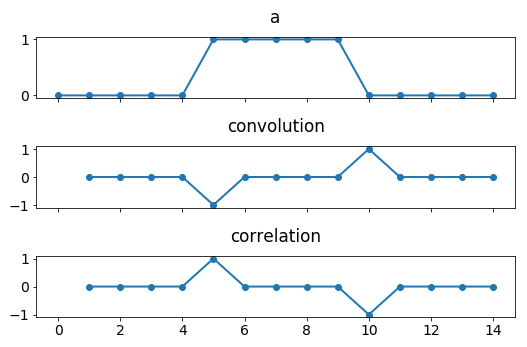

In [32]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(range(0, len(a)), a, 'o-')
ax[0].set_title('a')

ax[1].plot(range(1, len(a)), c, 'o-')
ax[1].set_title('convolution')

ax[2].plot(range(1, len(a)), cc, 'o-')
ax[2].set_title('correlation')
plt.tight_layout()

Looking at the plot we notice that both convolution and correlation have spikes when there's a jump in the array `a`. Our short filter `v` looks for jumps in `a` and the resulting convolution array represents how similar each window in `a` is with `v`.

> TIP: Since in a convolutional Neural Network the filter `v` is learned during the training process, it makes no difference whether we flip the filter or not. In fact, if we perform the flip, the network will simply learn flipped weights. For this reason, convolutional layers in a Neural Network are actually calculating correlations. We still call them **convolutional layers**, but the operation performed is actually a **correlation**. In what follows we will keep talking about convolutions, but we'll keep in mind that flipping the array is not actually necessary in practice.

### 2D Convolution

We can easily extend the 1D convolution to 2D convolutions using 2D arrays instead of 1D.

Let's say we have a 11x11 array `A` and a 3x3 filter `V`.

`A` contains a pattern in the shape of an "X". For the sake of simplicity, we will also rescale the values of the array so that the minimum value is -1 and the maximum is +1, but same concepts apply for different range of values.

In [33]:
A = np.zeros(shape=(11, 11))
A[2:-2, 2:-2] = np.diag(np.ones((7,))) + \
                np.flip(np.diag(np.ones((7,))), 0)
A[5, 5] = 1
A = A * 2 - 1
A

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

Let's display `A` with a gray colormap (because we're working with numbers between -1 and 1):

Text(0.5, 1.0, 'A')

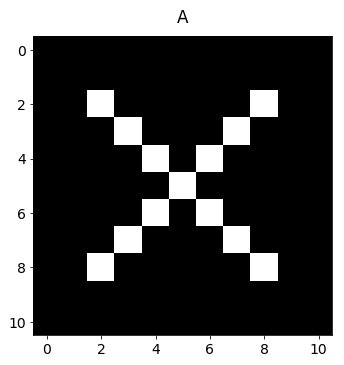

In [34]:
plt.figure(figsize=(5.5, 5.5))
plt.imshow(A, cmap='gray')
plt.title('A')

`V` is a 3x3 filter with a diagonal line:

In [35]:
V = np.diag([1, 1, 1])
V = V * 2 - 1
V

array([[ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1]])

Let's plot the `v` filter as well:

Text(0.5, 1.0, 'V')

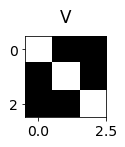

In [36]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(V, cmap = 'gray')
plt.title('V')

The 2D convolution can be calculated with the `scipy.convolve2d` function as from `scipy`. Let's import the function from `scipy` first:

In [37]:
from scipy.signal import convolve2d, correlate2d

Let's run the `convolve2d` function over `A` using the `V` tensor:

In [38]:
C = convolve2d(A, V, mode='valid')
C

array([[ 5.,  1.,  1.,  3.,  3.,  3.,  5.,  1.,  1.],
       [ 1.,  7., -1.,  1.,  3.,  5., -1.,  3.,  1.],
       [ 1., -1.,  9., -1.,  3., -1.,  1., -1.,  5.],
       [ 3.,  1., -1.,  9., -3.,  1., -1.,  5.,  3.],
       [ 3.,  3.,  3., -3.,  5., -3.,  3.,  3.,  3.],
       [ 3.,  5., -1.,  1., -3.,  9., -1.,  1.,  3.],
       [ 5., -1.,  1., -1.,  3., -1.,  9., -1.,  1.],
       [ 1.,  3., -1.,  5.,  3.,  1., -1.,  7.,  1.],
       [ 1.,  1.,  5.,  3.,  3.,  3.,  1.,  1.,  5.]])

The convolved array, is obtained by taking the filter `V`, flipping it on both axis and then multiplying it with a 3x3 patch in the image. Then we shift the patch to the right and repeat. We start at the first patch on the top left of the image `A[0:3, 0:3]`, multiply this patch with `V_rev` element by element, then sum all the values. 

We are effectively contracting the 2D tensor `V` with the patch over both axis:

In [39]:
V_rev = np.flip(np.flip(V, 1), 0)

In [40]:
np.tensordot(A[0:3, 0:3], V_rev)

array(5.)

This produces the first pixel in the output convolution. We then shift to the right by one pixel in `A` and repeat the contraction operation:

In [41]:
np.tensordot(A[1:4, 0:3], V)

array(1.)

We can continue doing this and accumulate the result in a new 2D array. 

Functionally, we can do the same exact thing that `scipy.convolve` does manually, although in practice we never need to do this thanks to `scipy`:

In [42]:
win_h = V_rev.shape[0]
win_w = V_rev.shape[1]

out_h = A.shape[0] - win_h + 1
out_w = A.shape[1] - win_w + 1

res = np.zeros((out_h, out_w))

for i in range(out_h):
    for j in range(out_w):
        patch_ij = A[i:i+win_h, j:j+win_w]
        try:
            res[i, j] = np.tensordot(patch_ij, V_rev)
        except Exception as ex:
            print(i, j)
            print(patch_ij)
            print(V)
            raise ex
            
np.allclose(res, C)

True

>TIP: the function `np.allclose` returns `True` if two arrays are element-wise equal within a tolerance. See the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) for details.

Notice that we can rescale the product by the number of elements in the filter `V`, which is 9, to obtain:

In [43]:
C_resc = C / 9
C_resc.round(2)

array([[ 0.56,  0.11,  0.11,  0.33,  0.33,  0.33,  0.56,  0.11,  0.11],
       [ 0.11,  0.78, -0.11,  0.11,  0.33,  0.56, -0.11,  0.33,  0.11],
       [ 0.11, -0.11,  1.  , -0.11,  0.33, -0.11,  0.11, -0.11,  0.56],
       [ 0.33,  0.11, -0.11,  1.  , -0.33,  0.11, -0.11,  0.56,  0.33],
       [ 0.33,  0.33,  0.33, -0.33,  0.56, -0.33,  0.33,  0.33,  0.33],
       [ 0.33,  0.56, -0.11,  0.11, -0.33,  1.  , -0.11,  0.11,  0.33],
       [ 0.56, -0.11,  0.11, -0.11,  0.33, -0.11,  1.  , -0.11,  0.11],
       [ 0.11,  0.33, -0.11,  0.56,  0.33,  0.11, -0.11,  0.78,  0.11],
       [ 0.11,  0.11,  0.56,  0.33,  0.33,  0.33,  0.11,  0.11,  0.56]])

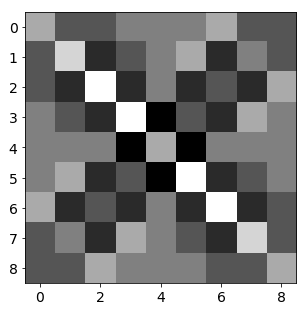

In [44]:
plt.imshow(C_resc, cmap='gray')

Four pixels in the resulting convolution are exactly equal to 1, corresponding to a perfect match of the filter with the image at those locations. The other pixels have smaller values with varying degrees, indicating partial match only.

### Image filters with convolutions

Convolutions can be used to perform filters on images, for example to blur it or detect the edges. Let's have a look at one example. We load an example image from `keras.datasets.mnist`:

In [45]:
from tensorflow.keras.datasets import mnist

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [47]:
img = x_train[0]

In [48]:
img.shape

(28, 28)

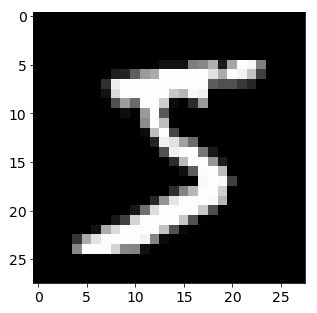

In [49]:
plt.imshow(img, cmap='gray')

Let's filter this image with 3x3 kernels that recognize lines:

In [50]:
f1 = np.array([[ 1,  0,  0],
               [ 0,  1,  0],
               [ 0,  0,  1]])

f2 = np.array([[ 0, 0,  1],
               [ 0, 1,  0],
               [ 1, 0,  0]])

f3 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]])

f4 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])

Let's see what these kernels look like visually with the method `imshow()`:

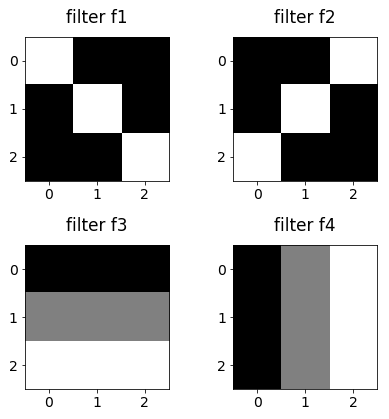

In [51]:
plt.figure(figsize=(6, 6))
plt.subplot(221)
ax = plt.imshow(f1, cmap='gray')
plt.title('filter f1')

plt.subplot(222)
plt.imshow(f2, cmap='gray')
plt.title('filter f2')

plt.subplot(223)
plt.imshow(f3, cmap='gray')
plt.title('filter f3')

plt.subplot(224)
plt.imshow(f4, cmap='gray')
plt.title('filter f4')

plt.tight_layout()
plt.show()

Now let's run the 2D convolution on the image and see what these convolutions produce:

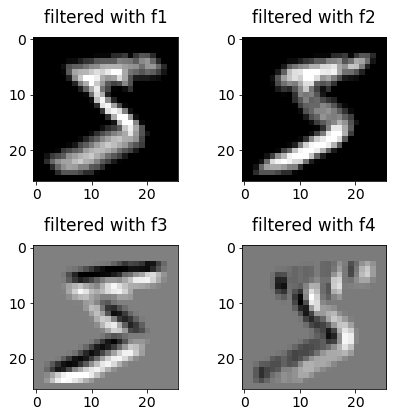

In [52]:
plt.figure(figsize=(6, 6))

plt.subplot(221)
res = convolve2d(img, f1, mode='valid')
plt.imshow(res, cmap='gray')
plt.title('filtered with f1')

plt.subplot(222)
res = convolve2d(img, f2, mode='valid')
plt.imshow(res, cmap='gray')
plt.title('filtered with f2')

plt.subplot(223)
res = convolve2d(img, f3, mode='valid')
plt.imshow(res, cmap='gray')
plt.title('filtered with f3')

plt.subplot(224)
res = convolve2d(img, f4, mode='valid')
plt.imshow(res, cmap='gray')
plt.title('filtered with f4')

plt.tight_layout()
plt.show()

Great! We have seen how convolutions can be used to filter images. Each pixel in the filtered image is the result of a tensor contraction of the filter with a patch in the original image. In this respect, the convolution is the operation that allows us to leverage the fact that information is related to spatial patterns of nearby pixels.

> TIP: If you've ever used an image program like Adobe Photoshop, these convolutions are how the image filters are created for images.

## Backpropagation for Recurrent Networks

The recurrent relations in the general case can be written as:

\begin{align}
z_t & = w \, h_{t-1} + u \, x_t \\
h_t & = \phi(z_t) \\
r_t & =  v \, h_t \\
\hat{y}_t & = \phi(r_t) \\
\end{align}

where we substituted the $\tanh$ activation function to a generic activation $\phi$ and allowed for different weights on the recurrent relation and the output relation.

The graph of this more general looks like this:

![recurrent_2.png](./assets/recurrent_2.png)

The backpropagation relations can be written as:

\begin{align}
\overline{\hat{y}} & = \frac{\partial J}{\partial \hat{y}} \\
\overline{r_t} & = \overline{\hat{y}}\, \phi'(r_t) \\
\overline{h_t} & = \overline{r_t}\, v + \overline{z_{t+1}} \,w \\
\overline{z_t} & = \overline{h_t} \,\phi'(z_t) \\
\overline{u} & = \sum_{t=0}^T \overline{z_t}\, x_t \\
\overline{v} & = \sum_{t=0}^T \overline{r_t} \,h_t \\
\overline{w} & = \sum_{t=0}^T \overline{z_{t+1}}\, h_t \\
\end{align}

As you can see, these relations are very similar to the fully connected backpropagation relations we saw in [Lab 5](5_Deep_Learning_Internals.ipynb#How-backpropagation-works), with a big difference: the updates to the weights require a summation on the contributions from all time.